In [1]:
import numpy as np
import pandas as pd
import keras
from keras.models import Sequential, Model, load_model
from keras.layers import Input, Conv1D, Conv2D, MaxPooling1D, MaxPooling2D, Dense, Dropout, Activation, Flatten
from keras.layers.normalization import BatchNormalization
import pickle
from keras.utils import to_categorical

Using TensorFlow backend.


In [2]:
TRAINING_DIR = 'C:/Users/manosatvik/Desktop/collg min project/mydataset/Train/triangle'
from keras.preprocessing.image import ImageDataGenerator
BATCH_SIZE=32
data_generator = ImageDataGenerator(rescale=0./1, validation_split=0.2)
training_generator = data_generator.flow_from_directory(TRAINING_DIR, target_size=(80,80), shuffle=True, seed=13,classes=None,
                                                     class_mode='categorical', batch_size=BATCH_SIZE, subset="training")

validation_generator = data_generator.flow_from_directory(TRAINING_DIR, target_size=(80,80), shuffle=True, seed=13,classes=None,
                                                     class_mode='categorical', batch_size=BATCH_SIZE, subset="validation")

Found 7176 images belonging to 15 classes.
Found 1794 images belonging to 15 classes.


(32, 80, 80, 3) (32, 15)
{'11': 0, '18': 1, '19': 2, '20': 3, '21': 4, '22': 5, '23': 6, '24': 7, '25': 8, '26': 9, '27': 10, '28': 11, '29': 12, '30': 13, '31': 14}
11


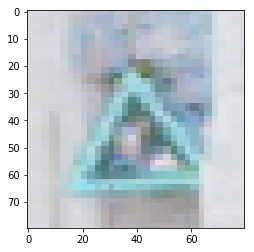

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
11


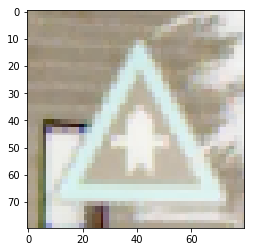

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
11


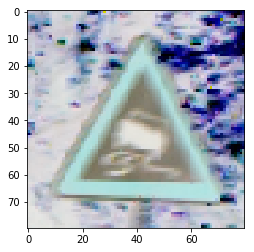

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
11


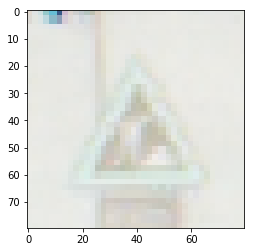

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
11


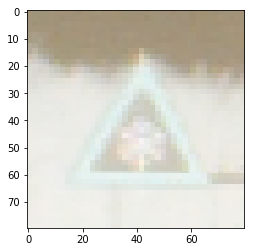

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
11


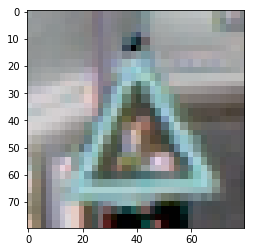

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
11


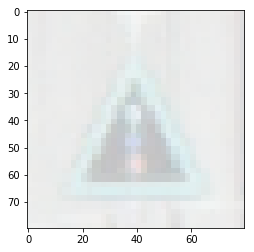

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
11


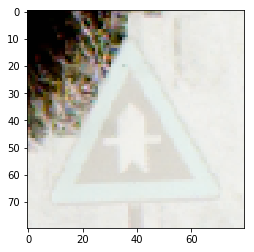

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
11


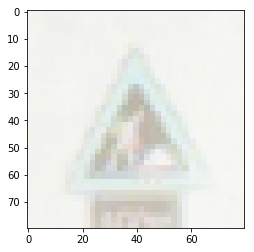

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
11


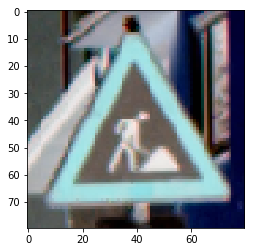

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
11


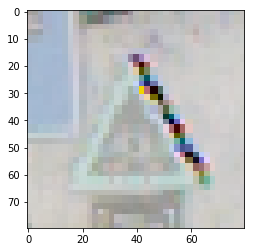

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
11


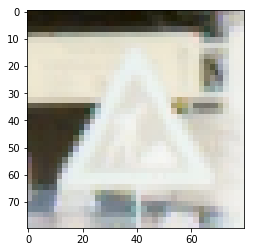

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
11


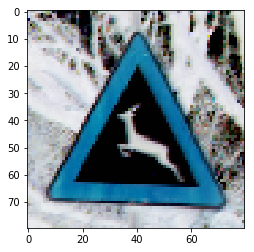

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
11


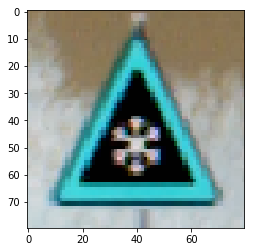

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
11


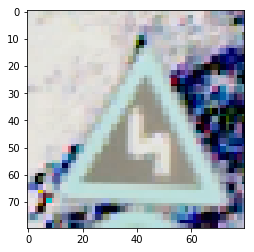

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
11


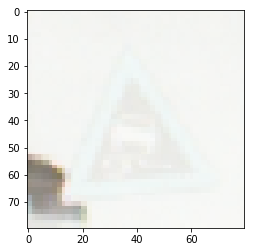

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
11


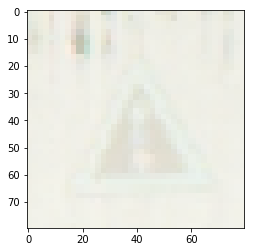

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
11


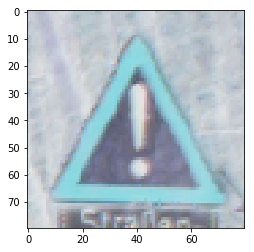

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
11


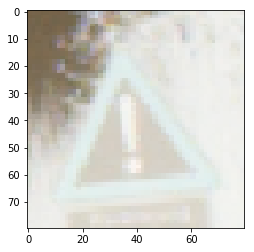

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
11


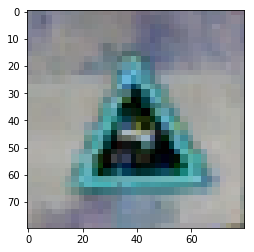

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


In [4]:
x,y = training_generator.next()
print(x.shape,y.shape)
labels = (training_generator.class_indices)
print(labels)
import matplotlib.pyplot as plt
import os
for i in range(0,20):
    image = x[i]
    image_label = os.path.dirname(validation_generator.filenames[i]) # only OK if shuffle=false
    print(image_label)
    plt.imshow(image)
    plt.show()
    print(y[i])

In [7]:
model = Sequential()

model.add(Conv2D(filters = 64, kernel_size = (5,5), activation ='relu',input_shape=(80,80,3)))
model.add(BatchNormalization(axis=3))
model.add(Conv2D(filters = 64, kernel_size = (5,5), activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization(axis=3))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 128, kernel_size = (5,5), activation ='relu'))
model.add(BatchNormalization(axis=3))
model.add(Conv2D(filters = 128, kernel_size = (5,5), activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization(axis=3))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 256, kernel_size = (5,5), activation ='relu'))
model.add(BatchNormalization(axis=3))
model.add(Conv2D(filters = 256, kernel_size = (5,5), activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization(axis=3))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(256, activation = "relu")) #Fully connected layer
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(60, activation = "relu")) #Fully connected layer
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(15, activation = "softmax")) #Classification layer or output layer

model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 76, 76, 64)        4864      
_________________________________________________________________
batch_normalization_9 (Batch (None, 76, 76, 64)        256       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 72, 72, 64)        102464    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
batch_normalization_10 (Batc (None, 36, 36, 64)        256       
_________________________________________________________________
dropout_6 (Dropout)          (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 32, 32, 128)       204928    
__________

In [8]:
model.fit_generator(generator=training_generator,
                   steps_per_epoch = int(7176 // 32),
                   epochs = 3,
                   verbose = 1,
                   validation_data = validation_generator,
                   validation_steps = int(1794 // 32))

Epoch 1/3
224/224 [==============================] - 1890s 8s/step - loss: 1.7011 - acc: 0.5267 - val_loss: 0.4513 - val_acc: 0.8958
Epoch 2/3
224/224 [==============================] - 1887s 8s/step - loss: 0.3257 - acc: 0.9208 - val_loss: 0.5547 - val_acc: 0.8590
Epoch 3/3
224/224 [==============================] - 1972s 9s/step - loss: 0.1497 - acc: 0.9715 - val_loss: 0.1392 - val_acc: 0.9588


In [9]:
model.save('triangle_model.h5')